# **Proyecto No. 2: Machine Learning**
## Modelo predictivo sobre los ingresos de la población adulta


---

Basado en la metodología **CRISP-DM** para minería de datos

La metodología **CRISP-DM** establece un proyecto de minería de datos como un secuencia de fases:

1.   Comprensión del negocio
2.   Comprensión de los datos
3.   Preparación de los datos
4.   Modelado
5.   Evaluación
6.   Despliegue

Se contemplan las fases 4, 5 y 6

##**Objetivos**:

**Segmentación de clientes**

*   Implementar un modelo de segmentación de clientes utilizando técnicas no supervisadas.
*   Identificación de grupos con características similares.

**Factores influyentes en ingresos**

*   Determinar factores que influyen en los ingresos individuales.
*   Identificación de variables críticas para mejorar ingresos.

**Dinámica Socioeconómica**

*   Identificar patrones y relaciones entre variables socioeconómicas.
*   Comprender mejor la dinámica social y económica de la población.


## Carga de datos

In [ ]:
# Carga el dataset transformado
adult_df = pd.read_csv(adultpath)

In [ ]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'b_income'],
      dtype='object')

In [ ]:
adult_df.shape

(32518, 13)

In [ ]:
adult_df.head()

age workclass  fnlwgt     education marital.status         occupation  \
0   82   Private  132870       HS_grad        Widowed    Exec-managerial   
1   66   unknown  186061  Some-college        Widowed            unknown   
2   54   Private  140359    basic_grad      Separated  Machine-op-inspct   
3   41   Private  264663  Some-college      Separated     Prof-specialty   
4   34   Private  216864       HS_grad      Separated      Other-service   

    race     sex  capital.gain  capital.loss  hours.per.week native.country  \
0  White  Female             0          4356              18  United-States   
1  Black  Female             0          4356              40  United-States   
2  White  Female             0          3900              40  United-States   
3  White  Female             0          3900              40  United-States   
4  White  Female             0          3770              45  United-States   

   b_income  
0         0  
1         0  
2         0  
3         0  
4         0

## Dispersión de los datos

Se procede a realizar un análsis de la dispersión de los datos para cada uno de los objetivos.



### Objetivo 1. Segmentación de clientes

Características analizadas:
*   'age'
*   'marital.status'
*   'occupation'
*   'hours.per.week'

Se observa una mayor concentración de personas ganando más de 50K al año entre los 30 y 60 años, trabajando entre 42 y 60 horas por semana. Los casados, especialmente entre 30 y 60 años y trabajando 40 a 60 horas semanales, también tienen ingresos superiores a 50K. En términos de ocupación, los ejecutivos que trabajan entre 40 y 60 horas a la semana muestran la mayor concentración de ingresos superiores a 50K al año.

### Objetivo 2. Identificación de factores influyentes en los ingresos

Características analizadas:

*   'Educación'
*   'Capital ganancia'

Se observa que en la categoría de educacion conforme avanzan en los niveles de educación (Bachilleres, Doctorado, grado superior de educación, maestría, etc) tienen una tendencia a tener capital ganancia mayor y a su vez salarios por encima de los 50K al año.

### Objetivo 3. Dinámica socioeconómica de la población

Características analizadas:

*   'Estado Civil'
*   'Ocupación'
*   'Educación'
*   'Raza'

Los ejecutivos, casados o no, son los que más frecuentemente tienen salarios superiores a 50K al año. Los casados con altos grados de educación, como bachilleres, doctorados y maestrías, también muestran ingresos superiores a 50K. Las personas de raza blanca y asiática, especialmente los casados y con altos niveles educativos, son quienes más ganan. Se observa una marcada dispersión en los datos relacionados con educación y raza. Tanto la población asiática como la de raza blanca con altos grados educativos tienden a tener ingresos superiores a 50K al año.

### Matriz de correlación



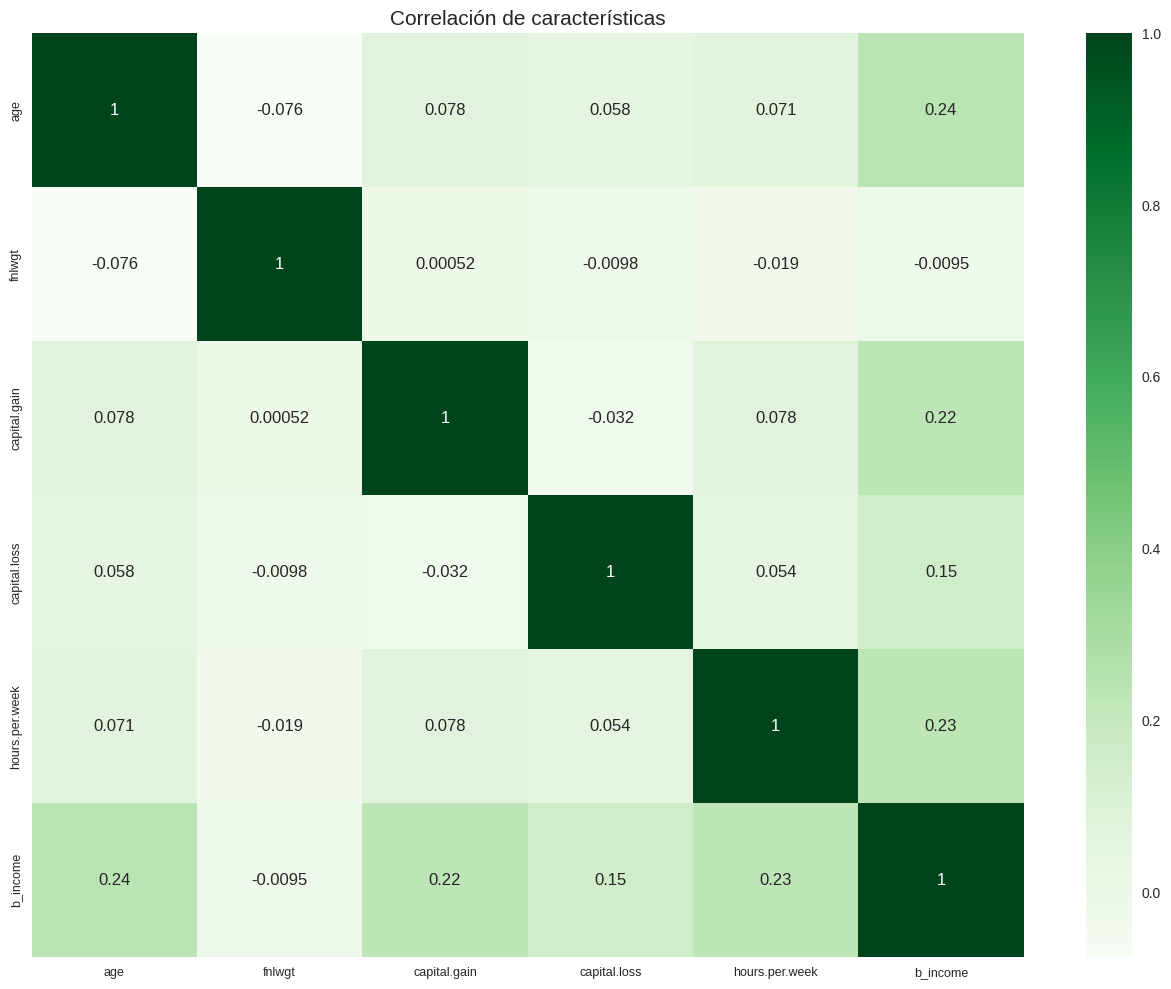

In [ ]:
# Para el mapa de calor se usarán las variables númericas del conjunto de datos

cols_num = ['age', 'fnlwgt','capital.gain', 'capital.loss', 'hours.per.week', 'b_income']
adult_num = adult_df[cols_num].astype('int64')

correlation_matrix(adult_num)


##### Análisis matriz de correlación

Se observa una correlación positiva moderada entre la edad y los ingresos, indicando que los ingresos tienden a aumentar con la edad. Asimismo, hay una correlación positiva moderada entre las horas trabajadas por semana y los ingresos, sugiriendo que más horas de trabajo se asocian con mayores ingresos. Además, existe una correlación positiva moderada entre el capital ganado y los ingresos, mostrando que a medida que aumentan los ingresos, también lo hace el capital ganado.



## Normalización de características numéricas

In [ ]:
cols_num = feature_log.dtypes[ feature_log.dtypes != 'object'].index

# Las características tendrán un mínimo de 0 y máximo de 1
scaler = MinMaxScaler()

# Mediante el algoritmo MinMaxScaler se realiza el tratamiento
# de las características numéricas para su normalización de escala

age workclass    fnlwgt     education marital.status  \
0  0.915493   Private  0.081896       HS_grad        Widowed   
1  0.690141   unknown  0.118021  Some-college        Widowed   
2  0.521127   Private  0.086982    basic_grad      Separated   
3  0.338028   Private  0.171404  Some-college      Separated   
4  0.239437   Private  0.138941       HS_grad      Separated   

          occupation   race     sex  capital.gain  capital.loss  \
0    Exec-managerial  White  Female           0.0      1.000000   
1            unknown  Black  Female           0.0      1.000000   
2  Machine-op-inspct  White  Female           0.0      0.986807   
3     Prof-specialty  White  Female           0.0      0.986807   
4      Other-service  White  Female           0.0      0.982762   

   hours.per.week native.country  
0        0.173469  United-States  
1        0.397959  United-States  
2        0.397959  United-States  
3        0.397959  United-States  
4        0.448980  United-States

## Preprocesar los datos

In [ ]:
# Se procede a codificar las características categóricas en características binarias
# para esto se hace uso de la técnica de codificación one-hot

encoded_cat_df = pd.DataFrame( encoded_cat, columns=encoded_cat_names )
encoded_cat_df.head()

workclass_Gov_employees  workclass_Never-worked  workclass_Private  \
0                      0.0                     0.0                1.0   
1                      0.0                     0.0                0.0   
2                      0.0                     0.0                1.0   
3                      0.0                     0.0                1.0   
4                      0.0                     0.0                1.0   

   workclass_Self_employed  workclass_Without-pay  workclass_unknown  \
0                      0.0                    0.0                0.0   
1                      0.0                    0.0                1.0   
2                      0.0                    0.0                0.0   
3                      0.0                    0.0                0.0   
4                      0.0                    0.0                0.0   

   education_Assoc-acdm  education_Assoc-voc  education_Bachelors  \
0                   0.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   

   education_Doctorate  ...  native.country_Puerto-Rico  \
0                  0.0  ...                         0.0   
1                  0.0  ...                         0.0   
2                  0.0  ...                         0.0   
3                  0.0  ...                         0.0   
4                  0.0  ...                         0.0   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                      0.0                   0.0                    0.0   
1                      0.0                   0.0                    0.0   
2                      0.0                   0.0                    0.0   
3                      0.0                   0.0                    0.0   
4                      0.0                   0.0                    0.0   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   

   native.country_United-States  native.country_Vietnam  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   native.country_Yugoslavia  native.country_unknown  
0                        0.0                     0.0  
1                        0.0                     0.0  
2                        0.0                     0.0  
3                        0.0                     0.0  
4                        0.0                     0.0  

[5 rows x 84 columns]

### Afinamiento del conjunto de datos

1. Se procede a eliminar aquellas columnas donde se incluya la palabra 'unknown' como parte de su nombre.

In [ ]:
# 1. Elimina las columnas cuyo nombre contiene la palabra 'unknown'
cols_with_unknown = [col for col in encoded_cat_df.columns if 'unknown' in col]
encoded_cat_df = encoded_cat_df.drop(cols_with_unknown, axis=1)


In [ ]:
# Se concatenan las características numéricas y categóricas en un solo dataframe


print('-----------------------------------------')
print('Número de características codificadas: {}'.format( len( xtrain_df.columns ) ) )
print('-----------------------------------------')
print('\n')

xtrain_df.head()

-----------------------------------------
Número de características codificadas: 86
-----------------------------------------




age    fnlwgt  capital.gain  capital.loss  hours.per.week  \
0  0.915493  0.081896           0.0      1.000000        0.173469   
1  0.690141  0.118021           0.0      1.000000        0.397959   
2  0.521127  0.086982           0.0      0.986807        0.397959   
3  0.338028  0.171404           0.0      0.986807        0.397959   
4  0.239437  0.138941           0.0      0.982762        0.448980   

   workclass_Gov_employees  workclass_Never-worked  workclass_Private  \
0                      0.0                     0.0                1.0   
1                      0.0                     0.0                0.0   
2                      0.0                     0.0                1.0   
3                      0.0                     0.0                1.0   
4                      0.0                     0.0                1.0   

   workclass_Self_employed  workclass_Without-pay  ...  \
0                      0.0                    0.0  ...   
1                      0.0                    0.0  ...   
2                      0.0                    0.0  ...   
3                      0.0                    0.0  ...   
4                      0.0                    0.0  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                      0.0                   0.0                    0.0   
1                      0.0                   0.0                    0.0   
2                      0.0                   0.0                    0.0   
3                      0.0                   0.0                    0.0   
4                      0.0                   0.0                    0.0   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   

   native.country_United-States  native.country_Vietnam  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   native.country_Yugoslavia  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 86 columns]

## Normalización del dataset completo

Este proceso se realiza para liberar a los algoritmos posteriores de no ser influenciados por las diferencias que puedan existir en escala para las características.

In [ ]:
# Se normaliza el dataset

scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(xtrain_df), columns = xtrain_df.columns)
normalized_data.head()


age    fnlwgt  capital.gain  capital.loss  hours.per.week  \
0  3.216352 -0.539456      -0.29889      5.067682       -1.818785   
1  2.032955 -0.035570      -0.29889      5.067682       -0.035841   
2  1.145407 -0.468511      -0.29889      4.997908       -0.035841   
3  0.183896  0.709038      -0.29889      4.997908       -0.035841   
4 -0.333840  0.256231      -0.29889      4.976517        0.369373   

   workclass_Gov_employees  workclass_Never-worked  workclass_Private  \
0                -0.392768               -0.014674           0.659191   
1                -0.392768               -0.014674          -1.517010   
2                -0.392768               -0.014674           0.659191   
3                -0.392768               -0.014674           0.659191   
4                -0.392768               -0.014674           0.659191   

   workclass_Self_employed  workclass_Without-pay  ...  \
0                  -0.3558              -0.020754  ...   
1                  -0.3558              -0.020754  ...   
2                  -0.3558              -0.020754  ...   
3                  -0.3558              -0.020754  ...   
4                  -0.3558              -0.020754  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                -0.033751                   -0.059052   
1                -0.033751                   -0.059052   
2                -0.033751                   -0.059052   
3                -0.033751                   -0.059052   
4                -0.033751                   -0.059052   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                -0.019214             -0.049349              -0.039634   
1                -0.019214             -0.049349              -0.039634   
2                -0.019214             -0.049349              -0.039634   
3                -0.019214             -0.049349              -0.039634   
4                -0.019214             -0.049349              -0.039634   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                -0.023534                       -0.024179   
1                -0.023534                       -0.024179   
2                -0.023534                       -0.024179   
3                -0.023534                       -0.024179   
4                -0.023534                       -0.024179   

   native.country_United-States  native.country_Vietnam  \
0                      0.340868               -0.045438   
1                      0.340868               -0.045438   
2                      0.340868               -0.045438   
3                      0.340868               -0.045438   
4                      0.340868               -0.045438   

   native.country_Yugoslavia  
0                  -0.022187  
1                  -0.022187  
2                  -0.022187  
3                  -0.022187  
4                  -0.022187  

[5 rows x 86 columns]

# 4. Modelado


## Reducción de la dimensionalidad PCA

In [ ]:
# Ajustar el modelo PCA
pca = PCA()
df_pca = pca.fit(normalized_data)

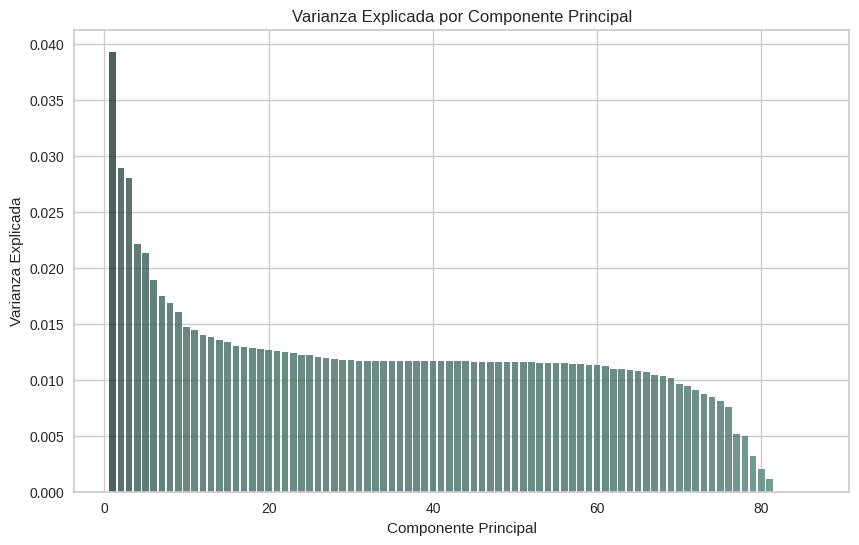

In [ ]:
# Gráfica la varianza explicada por componente
plot_explained_variance(pca)


##### Análisis Varianza explicada

Se observa una curva suave que desciende conforme se avanza en la cantidad de componentes y no muestra un codo claro, esto hace que pueda ser difícil determinar un número exacto de componetes a retener basado únicamente en este gráfico. Sin embargo, el descenso gradual en el tamaño de las barras sugiere que hay un disminución gradual en la proporción de varianza explicada por cada componente adicional exceptuando los primeros 7 componentes donde el descenso es mas pronunciado.


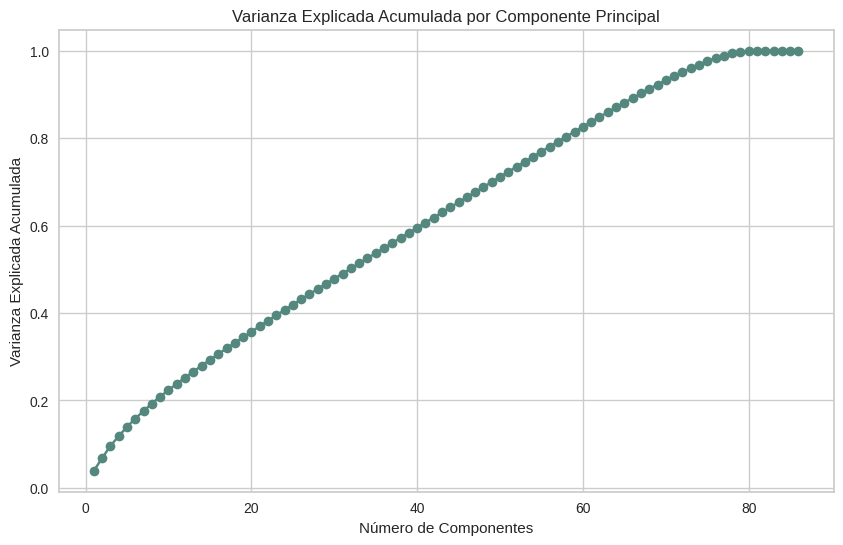

In [ ]:
# Gráfica la varianza explicada acumulada por componente
plot_cumulative_variance(pca)

##### Análisis Varianza explicada acumulada

Se observa un ascenso de la varianza acumulada desde el primer componente hasta alcanzar su punto máximo de ascenso en el componente número 79 donde posteriormente se estabiliza, esto sugiere que la mayoría de la varianza en los datos ya ha sido capturada por los componentes principales anteriores. Esto podría indicar que los primeros 79 componentes capturan la mayoría de la variabilidad en los datos.


##### Conclusión

Dado que la curva de la varianza explicada acumulada se estabiliza después del componente 79 y no hay un codo claro en el gráfico de varianza explicada, se podría considerar retener los primeros 79 componentes principales. Esto aseguraría que se este capturando la mayoría de la variabilidad en los datos. Sin embargo, también se podría analizar la posibidad de reducir el número de componentes a un número más pequeño, como 30 o 60 si fueran suficientes para el análisis.

In [ ]:
analyze_appropriate_components(pca)

Número de componentes a retener según la varianza explicada acumulada
---------------------------------------------------------------------
Retener 20 componentes, varianza explicada acumulada: 35.72%
Retener 23 componentes, varianza explicada acumulada: 39.47%
Retener 26 componentes, varianza explicada acumulada: 43.12%
Retener 29 componentes, varianza explicada acumulada: 46.68%
Retener 32 componentes, varianza explicada acumulada: 50.19%
Retener 35 componentes, varianza explicada acumulada: 53.69%
Retener 38 componentes, varianza explicada acumulada: 57.19%
Retener 41 componentes, varianza explicada acumulada: 60.68%
Retener 44 componentes, varianza explicada acumulada: 64.17%
Retener 47 componentes, varianza explicada acumulada: 67.66%
Retener 50 componentes, varianza explicada acumulada: 71.15%
Retener 53 componentes, varianza explicada acumulada: 74.62%
Retener 56 componentes, varianza explicada acumulada: 78.07%
Retener 59 componentes, varianza explicada acumulada: 81.49%
Retene

##### Observaciones de componentes a retener

Se observa que los primeros 59 componentes retienen el 80% de la varianza total.

Y el 100% de la varianza total se alcanza con 79 componentes aproximadamente tal y como se vio anteriormente en el gráfico de la varianza acumulada.

### Reducción de la dimensionalidad de los datos con PCA

Según el gráfico de varianza explicada acumulada se usara un total de 79 componentes

In [ ]:
# -------------------------------------------
# Aplicación de PCA para 79 componentes
# -------------------------------------------
pca = PCA(n_components=79)
pca_79 = pca.fit_transform(normalized_data)

### Análisis de los pesos por componente PCA

Se grafica un diagrama de pesos de cada característica por componente esto para los primeros 3 componentes principales quienes retienen la mayoría de la varianza explicada.






In [ ]:
------------------------------------------------------
Top de pesos de características por componente PCA
------------------------------------------------------
                  Característica    Peso  Componente
0                     sex_Female  0.4075           1
1   marital.status_Never-married  0.2905           1
2        occupation_Adm-clerical  0.1797           1
3                     race_Black  0.1736           1
4       occupation_Other-service  0.1711           1
5        workclass_Self_employed -0.2090           1
6                            age -0.2188           1
7                 hours.per.week -0.2247           1
8         marital.status_Married -0.4008           1
9                       sex_Male -0.4075           1
10       race_Asian-Pac-Islander  0.4435           2
11    native.country_Philippines  0.2375           2
12         native.country_Mexico  0.1762           2
13          native.country_India  0.1648           2
14          native.country_China  0.1541           2
15       occupation_Adm-clerical -0.0660           2
16      marital.status_Separated -0.0884           2
17                    sex_Female -0.1029           2
18                    race_White -0.3897           2
19  native.country_United-States -0.4862           2
20       workclass_Gov_employees  0.3421           3
21     occupation_Prof-specialty  0.3134           3
22                    sex_Female  0.2415           3
23             education_Masters  0.2037           3
24                           age  0.2023           3
25  occupation_Handlers-cleaners -0.1633           3
26       occupation_Craft-repair -0.1998           3
27                      sex_Male -0.2415           3
28             education_HS_grad -0.3029           3
29             workclass_Private -0.3578           3
------------------------------------------------------

##### Observaciones Pesos de características por componente

**Componente 1**


| Pesos Positivos |  Pesos Negativos
| --- | --- |
| sex_Female | workclass_Self_employed
| marital.status_Never-married | age
| occupation_Adm_clerical | hours.per.week
| race_Black | marital.status_Married
| occupation_Other-service | sex_Male
<br />
| Influencia positiva significativa | Influencia negativa significativa

<br />

**Componente 2**

| Pesos Positivos |  Pesos Negativos
| --- | --- |
| race_Asian-Pac-Islander | occupation_Adm-clerical
| native.country_Philippines | marital.status_Separated
| native.country_Mexico | sex_Female
| native.country_India | race_White
| native.country_China | native.country_United-States
<br />
| Influencia positiva significativa | Influencia negativa significativa

<br />

**Componente 3**

| Pesos Positivos |  Pesos Negativos
| --- | --- |
| workclass_Gov_employees | occupation_Handlers-cleaners
| occupation_Prof-specialty | occupation_Craft-repair
| sex_Female   | sex_Male
| education_Masters   | education_HS_grad
| age | workclass_Private
<br />
| Influencia positiva significativa | Influencia negativa significativa



### Gráficos de dispersión por componente PCA



##### Análisis Gráfico de dispersión Componentes 1 y 2

Los vectores de carga muestran una correlación negativa entre ser hombre y estar casado con el componente PC1, y una correlación positiva entre ser mujer y nunca haberse casado. Además, ser nacido en Estados Unidos y ser de raza blanca contribuyen negativamente al componente CP2, mientras que ser asiático o de islas del Pacífico contribuye positivamente.



##### Análisis Gráfico de dispersión Componentes 1 y 3

Los vectores de carga indican una correlación negativa entre ser hombre y estar casado con el componente PC1, y una correlación positiva entre ser mujer y nunca haberse casado. En el componente CP3, hay una correlación positiva entre ser empleado de gobierno, tener ocupación especializada, educación de bachillerato y maestría, y la edad; y una correlación negativa con trabajar en el sector privado y tener educación superior.


##### Análisis Gráfico de dispersión Componentes 2 y 3

Los vectores de carga indican una correlación negativa entre ser nacido en Estados Unidos y ser de raza blanca con el componente CP2, mientras que ser asiático o de las islas del Pacífico muestra una correlación positiva. En el componente CP3, ser empleado de gobierno, tener una ocupación profesional, ser mujer, y tener educación de bachillerato y maestría están correlacionados positivamente, mientras que trabajar en el sector privado, tener educación superior, y ser hombre muestran una correlación negativa.


In [ ]:
plot_biplot3D1(pca_79)

##### Observaciones generales

<br>

| Característica | Eje | Componente
|---|:---:|:---:|
| sexo femenino | + | PC1 |
| estado civil soltero | + | PC1 |
| raza Asiaticos | + | PC2 |
| empleados de gobierno | + | PC3 |
| profesionales | + | PC3 |
| Maestrías | + | PC3 |
| Bachilleres | + | PC3 |
| sexo masculino | - | PC1 |
| estado civil casado | - | PC1 |
| pais EEUU | - | PC2 |
| raza blanca | - | PC2 |
| trabajo privado | - | PC3 |
| grado educación alto | - | PC3 |

<br>

- CP1 sugiere una posible separación  basada en género y estado civil.
- CP2 sugiere una posible separación basada en la raza o el país de origen.
- CP3 sugiere una posible separación basada en el tipo de empleo y el nivel educativo.



## Clusterización con K-means

### Uso del método KElbowVisualizer para encontrar el K optimo

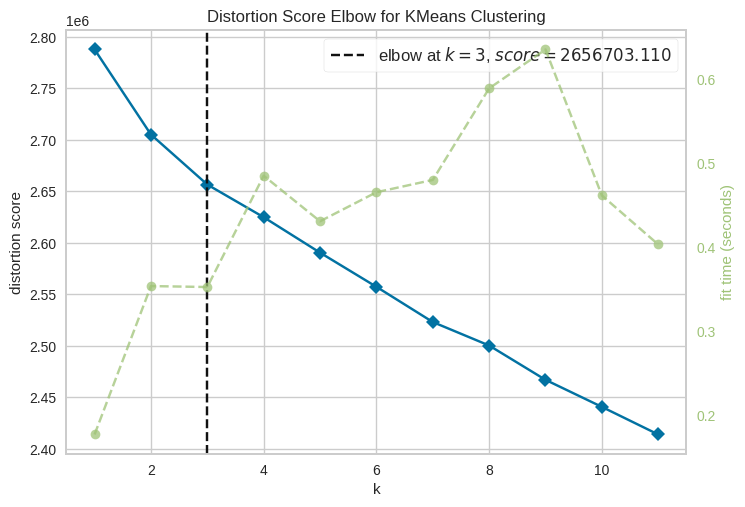

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_init='auto', random_state=42)
centers = list(range(1, 12))

visualizer=KElbowVisualizer(kmeans, k=centers)
visualizer.fit(pca_79)
visualizer.show()


##### Observación

De acuerdo al método del codo, donde se emplea la distancia media de las observaciones a su centroide, el valor de K óptimo encontrado en el conjunto de datos pca_79 es **K = 3**


In [ ]:
# Se ajusta el modelo a 3 Clústeres para obtener la predicción del conjunto de datos asociados a lo clústeres
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state=42)
model = kmeans.fit(pca_79)

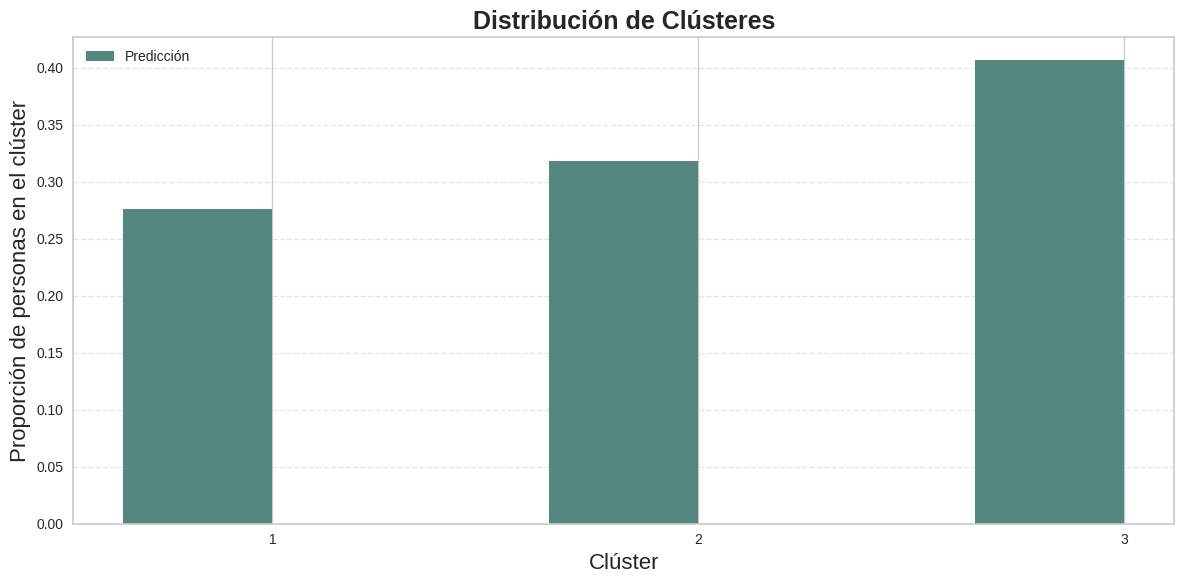

In [ ]:
plot_cluster_prop(cluster_prop)


##### Análisis de proporción de personas en el clúster

Hay una clara distibución de muestras en el clúster 3 alcanzando un 40% aproximadamente, seguido por el cluster 2 con un 31% aproximadamente y por último el clúster 0 con un 27% de la carga, se observa tres clúster bastante equilibrados.

### Gráfico de dispersión de PCA agrupados por clúster

Se realiza un diagrama de dispersión para cada uno de los primeros 3 componentes principales PCA agrupados por clúster.

<br>

##### Dispersión Compontente 1 y 2 por Clúster

Se aprecia que los dos primeros componentes principales están capturando cierta estructura en los datos, pero no lo suficiente como para separar completamente los clústers.

<br>

##### Dispersión Compontente 1 y 3 por Clúster

Las componentes principales 1 y 3 capturan aspectos importantes de la variabilidad en los datos y muestran una posible separación entre los clústeres. Sin embargo, ls superposición entre algunos clústeres sugiere que puede haber otros factores entre las variables que no están siendo capturadas completamente por estas dos componentes.

<br>

##### Dispersión Compontente 2 y 3 por Clúster

 Las componentes principales 2 y 3 capturan aspectos importantes de la variabilidad en los datos, pero la superposición entre los clusters sugiere que la estructura de los datos puede ser más compleja de lo que capturan estas dos componentes.


In [ ]:
plot_pca_clusters3D(pca_79)

##### Conclusión de la dispersión de los componentes principales entre los clústeres

Se sugiere una exploración más detallada de las características y considerar incluir características nuevas o la transformación de las existentes para mejorar la separación entre los clústeres.

### Evaluación de la calidad del clúster

Para este caso se va a proceder a evaluar la calidad de los clúster conformados con K-means usando el método de la silueta.

**Método puntuación de Silueta**

El método de silhouette scores nos da una medida media de la cohesión intra-cluster y la separación entre clusters. Sirve como una herramienta para evaluar la calidad de los clusters obtenidos por un algoritmo de agrupamiento, como KMeans.
Podemos visualizarlo de dos maneras: como score (un valor único por cluster) y como un gráfico calculando el Silhouette score por punto.

El método de score es una medida media de la cohesión y separación de los clusters.

- Cada punto de datos tiene una puntuación de silueta que varía entre -1 y 1.
- Una puntuación de silueta alta indica que el punto está bien situado en su propio cluster y está lejos de los clusters vecinos. Una puntuación cercana a 1 indica una buena separación entre clusters.
- Una puntuación de silueta baja indica que el punto está cerca de los límites del cluster, lo que sugiere que podría estar en el cluster equivocado. Una puntuación cercana a -1 indica que el punto está más cerca del cluster vecino que del propio cluster.
- Una puntuación de silueta cercana a 0 indica superposición entre clusters o que el punto podría estar en una región de baja densidad.
- Cada color representa un cluster.

El gráfico de silueta muestra una línea punteada que corta a través de los clústers y representa la puntuación de silueta promedio de todos los datos en el conjunto. Esta línea proporciona una medida general de la calidad de la agrupación en el conjunto de datos. Si la mayoría de las barras de silueta de los puntos están por encima de esta línea, indica que los clusters están bien separados y que la agrupación es de buena calidad. Por otro lado, si muchas de las barras están por debajo de esta línea, puede indicar que los clusters están demasiado cerca o que hay puntos mal asignados. En general, se busca que la línea punteada esté lo más alta posible para una agrupación de alta calidad.

<br>

Fuente: ([Algoritmo KMeans - Teoría](https://aprendeia.com/algoritmo-kmeans-clustering-machine-learning))

Fuente: ([Introducción al clustering con Python y sklearn](https://www.kaggle.com/code/micheldc55/introduccion-al-clustering-con-python-y-sklearn))


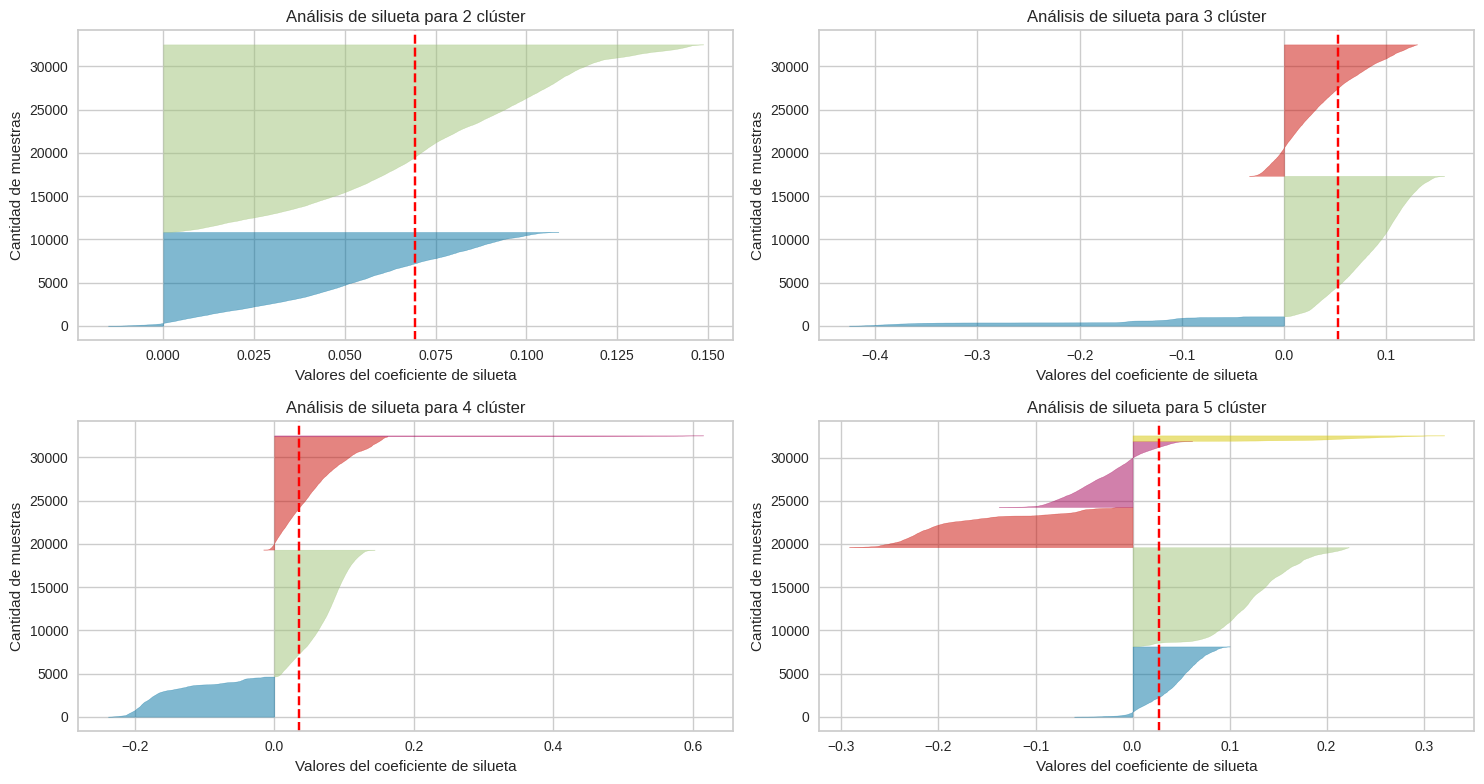

In [ ]:
# pinta el gráfico de silueta
data = pca_79.copy()
n_cluster = 6

plot_silhouette( data, n_cluster )

##### Observación

Como se menciono anteriormente la línea punteada roja representa el valor medio del Sillhouette score de todos los cluster y es la medida a utilizar para saber el número de clústeres a utilizar. En este caso el score más alto corresponde a 2 clúster.

El método del codo para encontrar el K óptido ejecutado con anterioridad sugiere que el número óptimo de clusters es 3, mientras el método de la silueta muestra que la medida media de la cohesión intra-cluster es más alta con 2 clusters, podría haber discrepancias en la elección del número óptimo de clusters entre estos dos métodos.

Esto puede ocurrir debido a las diferentes formas en que cada métrica evalúa la calidad de la agrupación.

La discrepancia en las sugerencias de número de clusters entre estos dos métodos podría indicar que hay una cierta ambigüedad en los datos o que diferentes aspectos de la estructura de los datos están siendo capturados por estas métricas.


## Modelos supervisados

### Entrenar y evaluar el modelo

Para esto se va a realizar pruebas con algunos modelos de aprendizaje automático como los siguientes:

1. Regresión logística
   
   Algoritmo de clasificación lineal que se utiliza para predecir la probabilidad de que una instancia pertenezca a una clase particular.
2. Árbol de decisiones.
   
   Es un modelo no lineal que utiliza una estructura de árbol para dividir el espacio de características en regiones que representan clases.
3. K-Vecinos más cercanos.
   
   Este algoritmo clasifica nuevas instancias basándose en las clases de las instancias "vecinas" más cercanas en el espacio de características.
4. Bosques aleatorios.
   
   Es un conjunto de árboles de decisión que funciona entrenando varios árboles en diferentes subconjuntos del conjunto de datos y promediando sus predicciones.
5. AdaBoost
   
   Es un algoritmo de conjunto que combina múltiples clasificadores débiles en un clasificador fuerte. Cada clasificador se entrena secuencialmente, y los ejemplo mal clasificados reciben un mayor peso en cada iteración.
6. Máquinas de Soporte Vectorial.
   
   Son modelo de aprendizaje supervisado que utilizan hiperplanos para separar las clases en un espacio de características de alta dimensión. Pueden manejar eficazmente datos de alta dimensionalidad y son versátiles en términos de la función de kernel utilizada.

<br>

Fuente: ([Aprendizaje automático con Scikit Learn](https://joserzapata.github.io/courses/python-ciencia-datos/ml/))



In [ ]:
# Se procede a generar los conjuntos de datos de entrenamiento y prueba
# Para el conjunto de prueba se va a usar un 40% de los datos originales

xtrain, xtest, ytrain, ytest = train_test_split( normalized_data, income_data, test_size = 0.4, random_state = 42)

In [ ]:
# Definir el diccionario con los nombres de las variables y sus tamaños
data = {
    'DataFrame': ['xtrain', 'ytrain', 'xtest', 'ytest'],
    'Tamaño': [xtrain.shape[0], ytrain.shape[0], xtest.shape[0], ytest.shape[0]]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
display(df)


DataFrame  Tamaño
0    xtrain   19510
1    ytrain   19510
2     xtest   13008
3     ytest   13008

#### Matriz de confusión

La matriz de confusión, también conocida como matriz de error, es un instrumento tecnológico que sirve para calcular el rendimiento sobre un modelo de clasificación definido


![Matriz de confusion](https://datascientest.com/es/wp-content/uploads/sites/7/2024/01/Sans-titre-3_Plan-de-travail-1-768x446-1.png)

Las métricas se dividen en 4 categorías :

1. Exactitud (Accuracy) : en comparación con todas las clases, la métrica «Exactitud» muestra cuántas se predijeron correctamente.

2. Precisión : la métrica «Precisión» expresa cuántos de los resultados positivos que se han predicho son verdaderamente positivos.

3. Medida F1 score : la métrica «F1 score» se revela muy útil para comparar un modelo de alta sensibilidad (recall) con otro modelo de baja precisión.

4. Sensibilidad (Recall)  : esta métrica indica con exactitud cuántas clases positivas se predijeron correctamente.

5. Especificidad (Specificity) : corresponde a la proporción de observaciones negativas correctamente clasificadas sobre el total de observaciones que son realmente negativas.

6. Tasa de falsos positivos (False Positive Rate) : corresponde a la proporción de observaciones negativas incorrectamente clasificadas como positivas sobre el total de observaciones que son realmente negativas.


Fuente ([Matriz de confusión](https://datascientest.com/es/matriz-de-confusion#:~:text=La%20matriz%20de%20confusi%C3%B3n%20indica,valor%20real%20es%20igualmente%20positiva.))

-----------------------------------------------------------------------------
                             LogisticRegression(max_iter=10000)                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 84.0944%


Accuracy2: 84.0944%
Matriz de confusión
-------------------


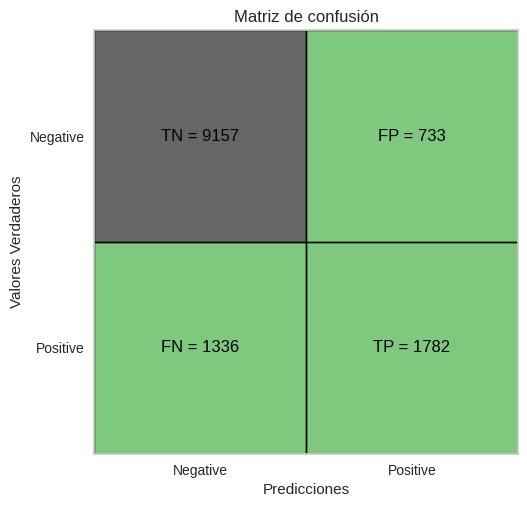



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.840944
1            Precision    0.708549
2               Recall    0.571520
3          Specificity    0.925885
4  False Positive Rate    0.074115


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.87      0.93      0.90      9890
  Más de 50K       0.71      0.57      0.63      3118

    accuracy                           0.84     13008
   macro avg       0.79      0.75      0.77     13008
weighted avg       0.83      0.84      0.83     13008



-----------------------------------------------------------------------------
                             DecisionTreeClassifier()                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 80.4889%


Accuracy2: 80.4889%
Matriz

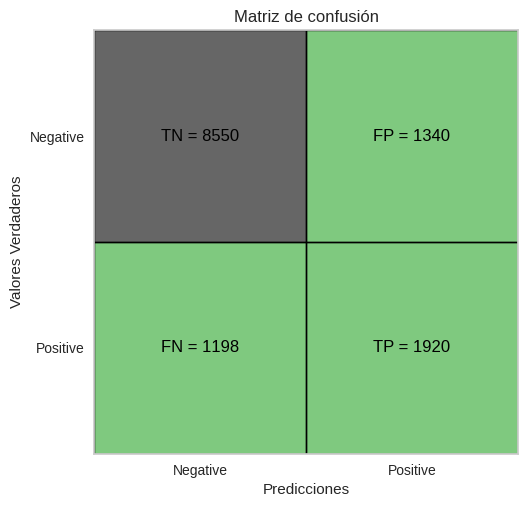



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.804889
1            Precision    0.588957
2               Recall    0.615779
3          Specificity    0.864510
4  False Positive Rate    0.135490


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.88      0.86      0.87      9890
  Más de 50K       0.59      0.62      0.60      3118

    accuracy                           0.80     13008
   macro avg       0.73      0.74      0.74     13008
weighted avg       0.81      0.80      0.81     13008



-----------------------------------------------------------------------------
                             KNeighborsClassifier()                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 81.9188%


Accuracy2: 81.9188%
Matriz d

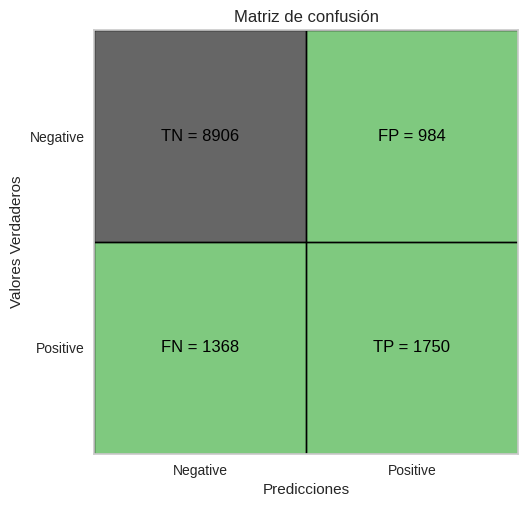



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.819188
1            Precision    0.640088
2               Recall    0.561257
3          Specificity    0.900506
4  False Positive Rate    0.099494


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.87      0.90      0.88      9890
  Más de 50K       0.64      0.56      0.60      3118

    accuracy                           0.82     13008
   macro avg       0.75      0.73      0.74     13008
weighted avg       0.81      0.82      0.81     13008



-----------------------------------------------------------------------------
                             RandomForestClassifier()                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 84.4557%


Accuracy2: 84.4557%
Matriz

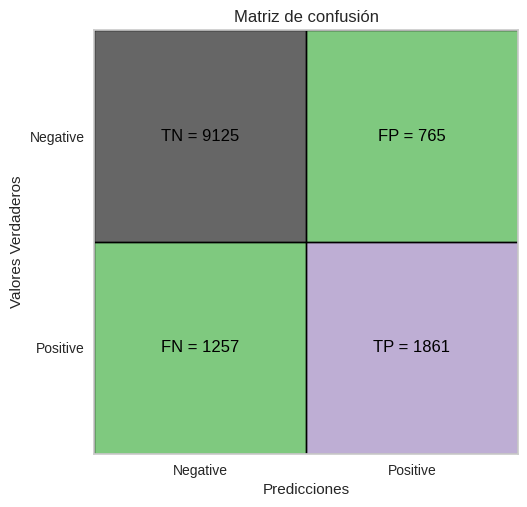



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.844557
1            Precision    0.708682
2               Recall    0.596857
3          Specificity    0.922649
4  False Positive Rate    0.077351


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.88      0.92      0.90      9890
  Más de 50K       0.71      0.60      0.65      3118

    accuracy                           0.84     13008
   macro avg       0.79      0.76      0.77     13008
weighted avg       0.84      0.84      0.84     13008



-----------------------------------------------------------------------------
                             AdaBoostClassifier()                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 86.0470%


Accuracy2: 86.0470%
Matriz de 

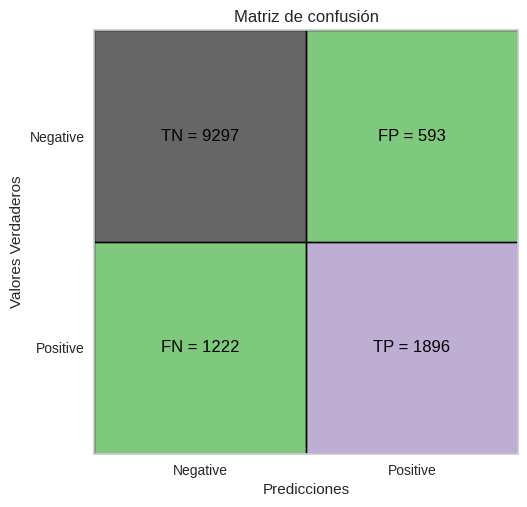



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.860470
1            Precision    0.761752
2               Recall    0.608082
3          Specificity    0.940040
4  False Positive Rate    0.059960


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.88      0.94      0.91      9890
  Más de 50K       0.76      0.61      0.68      3118

    accuracy                           0.86     13008
   macro avg       0.82      0.77      0.79     13008
weighted avg       0.85      0.86      0.85     13008



-----------------------------------------------------------------------------
                             SVC()                                         
-----------------------------------------------------------------------------


Precisión del modelo
--------------------
Accuracy: 83.4486%


Accuracy2: 83.4486%
Matriz de confusión
-----

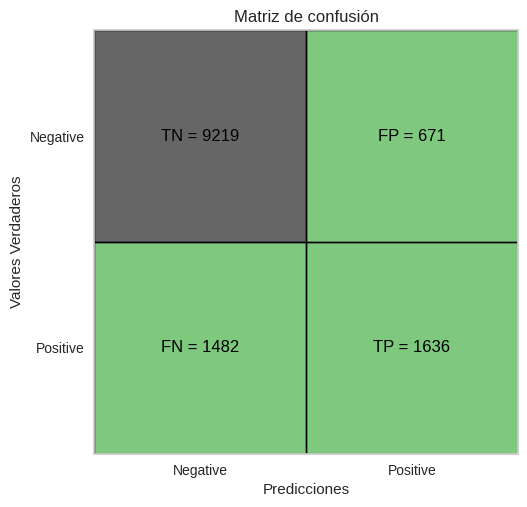



Métricas
--------------------------
               Métrica  Porcentaje
0             Accuracy    0.834486
1            Precision    0.709146
2               Recall    0.524695
3          Specificity    0.932154
4  False Positive Rate    0.067846


Reporte de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

   Menos 50K       0.86      0.93      0.90      9890
  Más de 50K       0.71      0.52      0.60      3118

    accuracy                           0.83     13008
   macro avg       0.79      0.73      0.75     13008
weighted avg       0.82      0.83      0.83     13008





In [ ]:
# Entrena y evalua el modelo
accuracy = train_and_evaluate( models )

##### Resultados

<br>

| Modelo                      | Precisión | Recall | Especificidad | Tasa de Falsos Positivos |
|-----------------------------|-----------|--------|----------------|---------------------------|
| Logistic Regression         | 84.09%    | 57.15% | 92.59%         | 7.41%                     |
| Decision Tree               | 80.59%    | 61.03% | 86.75%         | 13.25%                    |
| K Neighbors Classifier      | 81.92%    | 56.13% | 90.05%         | 9.95%                     |
| Random Forest               | 84.52%    | 59.37% | 92.45%         | 7.55%                     |
| AdaBoost                    | 86.05%    | 60.81% | 94.00%         | 5.59%                     |
| Support Vector Classifier   | 83.45%    | 52.47% | 93.22%         | 6.78%                     |




In [ ]:
# Muestra los modelos y su precisión
pd.DataFrame(accuracy, columns = ['Precisión'], index = classifiers).sort_values(by = 'Precisión', ascending = False)

Precisión
Adaboost             0.860470
RandomForest         0.844557
LogisticRegression   0.840944
SVC                  0.834486
KNN                  0.819188
DecisionTree         0.804889

##### Observación

De los modelos utilizados dentro del entrenamiento aquél que obtuvo una mejor precisión fue Adaboost llegando a un 86%, seguido de RandomForest con un 84%.

Se sugiere:
1. Elegir 4 modelos de los expuesto.
2. Aplicar alguna técnica para reducción del conjunto de características.
3. Aplicar un afinamiento a los parámetros de los modelos.

#### **Elección de los modelos**

<br>

**RandomForest:**

De acuerdo a la literatura este modelo es apto tanto para características numéricas como categóricas. Es un modelo que tiende a tener un buen rendimiento en una variedad de conjunto de datos y es menos propenso a sobreajuste.

<br>

**AdaBoost:**

Funciona bien con una variedad de tipos de datos. Captura relaciones complejas entre las características y el objetivo.

<br>

**DecisionTree:**

Es menos sofisticado que el RandomForest, pero muy útil para entender la estructura de los datos y las relaciones entre las características y el objetivo. Es simple de entender y puede proporcionar una buena línea base para la clasificación binaria.

<br>

**LogisticRegression:**

Diseñado principalmente para características numéricas pero puede ser adaptado a características categóricas si estas han sido previamente codificadas. Es simple, rápido y fácil de interpretar, y puede proporcionar una buena línea base para la clasificación binaria en conjuntos de datos.

<br>

**Análisis**

<br>

**RandomForestClassifier:**

El RandomForestClassifier muestra el segundo mejor rendimiento general en términos de precisión, recall y especificidad, así como la tasa más baja de falsos positivos.

<br>

**AdaBoostClassifier:**

El AdaBoostClassifier muestra el mejor rendimiento en precisión y recall, así como la tasa más baja de falsos positivos. Además, tiene la mayor especificidad, lo que sugiere una capacidad para identificar correctamente las instancias negativas.

<br>

**DecisionTreeClassifier:**

Aunque el DecisionTreeClassifier tiene una precisión y un recall más bajos que los dos modelos anteriores, sigue siendo una opción sólida con una precisión razonable y una especificidad decente.

<br>

**LogisticRegression:**

La LogisticRegression también muestra un buen rendimiento, con una precisión y una especificidad competitivas, aunque su recall es un poco más bajo que los modelos anteriores.

#### Validación cruzada

Un problema presente en la estimación de los modelos es el aprendizaje de los parámetros de una función de predicción y probarla con los mismos datos dándo como resultado un modelo que con los mismos conjuntos de datos siempre obtendría predicciones perfectas pero sensible con nuevos conjuntos de datos, situación conocida como sobreajuste.
Cuando se evalúan modelos con diferentes configuraciones (hiperparámetros), existe el riesgo del sobreajuste sobre el conjunto de datos de prueba porque los parámetros se pueden modificar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" al modelo y las métricas de evaluación ya no informan sobre el desempeño de la generalización. Esto es resuelto mediante un tercer conjunto de datos llamado "conjunto de validación", el modelo se entrena con el conjunto de datos de entrenamiento, despues pasa a evaluar con el conjunto de validación y cuando ya el modelo esta estable finaliza la evaluación con el conjunto de prueba.

La siguiente imagen ilustra el proceso.

<br>

![Matriz de confusion](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

<br>

Al dividir los datos disponibles en tres conjuntos, se reduce drásticamente la cantidad de muestras que se pueden usar para aprender del modelo.

Como una solucion a la problemática anterior se usa la "validación cruzada" donde el conjunto de validación ya no es necesario.

Este enfoque se conoce como "*k-fold CV*", el conjunto de entrenamiento se divide en k conjuntos más pequeños. Se sigue el siguiente procedimiento para cada uno de los k pliegues ("*fold*").



*   Un modelo se entrena usando k-1 de los pliegues como datos de entrenamiento.
*   el modelo resultante se valida con la parte restante de los datos ( se usa como conjunto de pruebas para calcular una medida de rendimiento como la precisión).

La medida de rendimiento dada por la validación cruzada corresponde al promedio de los valores calculados en el bucle de k veces.

El enfoque puede verse de la siguiente manera:

<br>

![Matriz de confusion](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

<br>

Fuente ([Validación cruzada](https://scikit-learn.org/stable/modules/cross_validation.html))

<br>

Se procede a utilizar la validación cruzada para obtener una mejor estimación del rendimiento de los modelos estudiados.





In [ ]:
classifiers_cv = ['Adaboost','RandomForest','LogisticRegression', 'DecisionTree']

models_cv = {clf_ada   : 'Adaboost',
             clf_forest: 'RandomForest',
             clf_logreg:'LogisticRegression',
             clf_tree  :'DecisionTree'}


In [ ]:
mean_score, std_score = cross_validation( models_cv, normalized_data, income_data )

df_scores = pd.DataFrame({
    'Mean_Accuracy': mean_score,
    'Std_Accuracy' : std_score
}, index=classifiers_cv)

df_scores = df_scores.sort_values(by='Mean_Accuracy', ascending=False)

df_scores

Mean_Accuracy  Std_Accuracy
LogisticRegression       0.813704      0.089279
Adaboost                 0.797007      0.089554
RandomForest             0.793039      0.092893
DecisionTree             0.745897      0.080086

### Selección de características

Se aplican los siguientes pasos:

1. Eliminación de características recursivas por medio del algoritmo RFE asociado en cada uno de los modelos y aplicado al cojunto de los datos.

2. Elección de los hiperparámetros a evaluar en cada uno de los modelos.


<br>

Fuente1 ([RFE](https://machinelearningmastery.com/rfe-feature-selection-in-python/))

Fuente2 ([Ajuste de hiperparámetros](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/))


In [ ]:
# Reduce el conjunto de características para cada modelo e
# Identifica los hiperparámetros óptimos para cada modelo


for model, (classifiers_name, parameter) in models_cv.items():
    grid_result, xtrain_features, rfe_classifier = refit_model( model, xtrain, ytrain, parameter)

    grid_best_score     = grid_result.best_score_
    grid_best_params    = grid_result.best_params_
    grid_best_estimator = grid_result.best_estimator_

    print(f"Clasificador <{classifiers_name}>, mejor puntaje: %f usando %s" % (grid_best_score, grid_best_params))



Clasificador <Adaboost>, mejor puntaje: 0.865812 usando {'n_estimators': 1000}
Clasificador <RandomForest>, mejor puntaje: 0.850231 usando {'max_features': 'log2', 'n_estimators': 1000}
Clasificador <LogisticRegression>, mejor puntaje: 0.843926 usando {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Clasificador <DecisionTree>, mejor puntaje: 0.804254 usando {'ccp_alpha': 0.0}


In [ ]:

importance_predictors = get_importance_predictores( grid_best_results )

# se agrupa por modelo y obtener el top 10 de importancias
top_10_per_model  = importance_predictors .groupby('modelo').apply(lambda x: x.nlargest(10, 'importancia'))


# Imprimir el DataFrame con la importancia de las características
print("------------------------------------------------------------------------------")
print("Importancia de los predictores en el modelo")
print("------------------------------------------------------------------------------")

display(top_10_per_model )


------------------------------------------------------------------------------
Importancia de los predictores en el modelo
------------------------------------------------------------------------------


predictor  importancia  \
modelo                                                           
Adaboost           2                 capital.gain     0.320000   
                   3                 capital.loss     0.309000   
                   1                       fnlwgt     0.217000   
                   4               hours.per.week     0.054000   
                   0                          age     0.051000   
                   15      education_Some-college     0.003000   
                   10         education_Bachelors     0.002000   
                   11         education_Doctorate     0.002000   
                   12           education_HS_grad     0.002000   
                   13           education_Masters     0.002000   
DecisionTree       1                       fnlwgt     0.193899   
                   17      marital.status_Married     0.190474   
                   0                          age     0.134373   
                   2                 capital.gain     0.120209   
                   4               hours.per.week     0.070310   
                   3                 capital.loss     0.041696   
                   12           education_HS_grad     0.036614   
                   16        education_basic_grad     0.020258   
                   22  occupation_Exec-managerial     0.014058   
                   15      education_Some-college     0.013233   
LogisticRegression 18    marital.status_Separated     0.714412   
                   2                 capital.gain     0.526040   
                   4               hours.per.week     0.379120   
                   0                          age     0.347557   
                   7      workclass_Self_employed     0.345903   
                   22  occupation_Exec-managerial     0.271109   
                   10         education_Bachelors     0.252519   
                   3                 capital.loss     0.247030   
                   5      workclass_Gov_employees     0.231351   
                   13           education_Masters     0.216789   
RandomForest       1                       fnlwgt     0.175326   
                   0                          age     0.168881   
                   2                 capital.gain     0.107024   
                   4               hours.per.week     0.092381   
                   17      marital.status_Married     0.088901   
                   18    marital.status_Separated     0.036030   
                   3                 capital.loss     0.033821   
                   12           education_HS_grad     0.023004   
                   23  occupation_Farming-fishing     0.022070   
                   28  occupation_Protective-serv     0.020114   

                                   modelo  
modelo                                     
Adaboost           2             Adaboost  
                   3             Adaboost  
                   1             Adaboost  
                   4             Adaboost  
                   0             Adaboost  
                   15            Adaboost  
                   10            Adaboost  
                   11            Adaboost  
                   12            Adaboost  
                   13            Adaboost  
DecisionTree       1         DecisionTree  
                   17        DecisionTree  
                   0         DecisionTree  
                   2         DecisionTree  
                   4         DecisionTree  
                   3         DecisionTree  
                   12        DecisionTree  
                   16        DecisionTree  
                   22        DecisionTree  
                   15        DecisionTree  
LogisticRegression 18  LogisticRegression  
                   2   LogisticRegression  
                   4   LogisticRegression  
                   0   LogisticRegression  
                   7   LogisticRegression  
                   22  LogisticRegression  
                   10  LogisticRegr

In [ ]:
# Reentrena el modelo con el conjunto de datos reducido

accuracy = []

for classifiers_name, result in grid_best_results.items():

    model = result['best_estimator']
    xtrain_reduced = result['xtrain_features']

    xtest_cols = xtrain_reduced.columns
    xtest_reduced = xtest.reindex(columns=xtest_cols)

    ypred = model.predict( xtest_reduced )

    accuracy_scores = accuracy_score(
            y_true    = ytest,
            y_pred    = ypred,
            normalize = True
           )
    accuracy.append( accuracy_scores )


# Muestra los modelos y su precisión
pd.DataFrame(accuracy, columns = ['Precisión'], index = classifiers_cv).sort_values(by = 'Precisión', ascending = False)


Precisión
Adaboost             0.868158
RandomForest         0.848478
LogisticRegression   0.839022
DecisionTree         0.807657

##### Observación


| **Modelo** | **Precisión datos Iniciales** | **Precisión datos reducidos**
|---|:---:|:---:|
| Adaboost | 0.860470 | 0.868158 |
| RandomForest | 0.845172 | 0.847402 |
| LogisticRegression | 0.840944 | 0.839022 |
| DecisionTree | 0.805889 | 0.805274 |

<br>

La reducción del conjunto de características y el ajuste de los hiperparámetros ha permitido mejorar la precisión de los modelos Adaboost y RandomForest, en cambio los modelos LogisticRegression y DecisionTree han presentado una leve reducción en su precisión.



### Importancia de las características

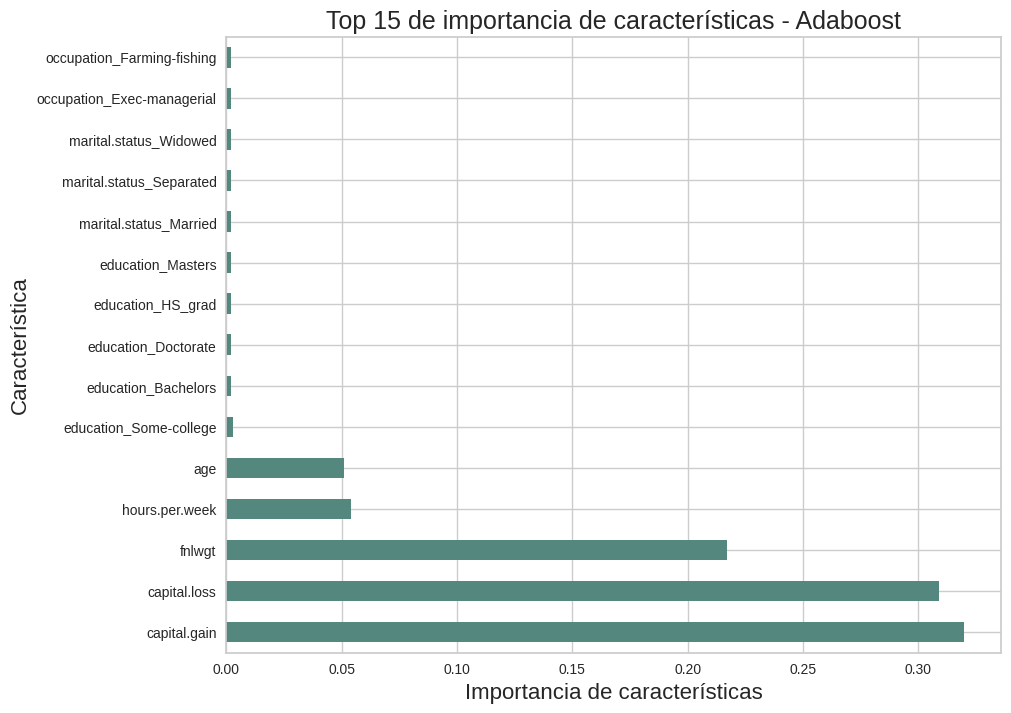

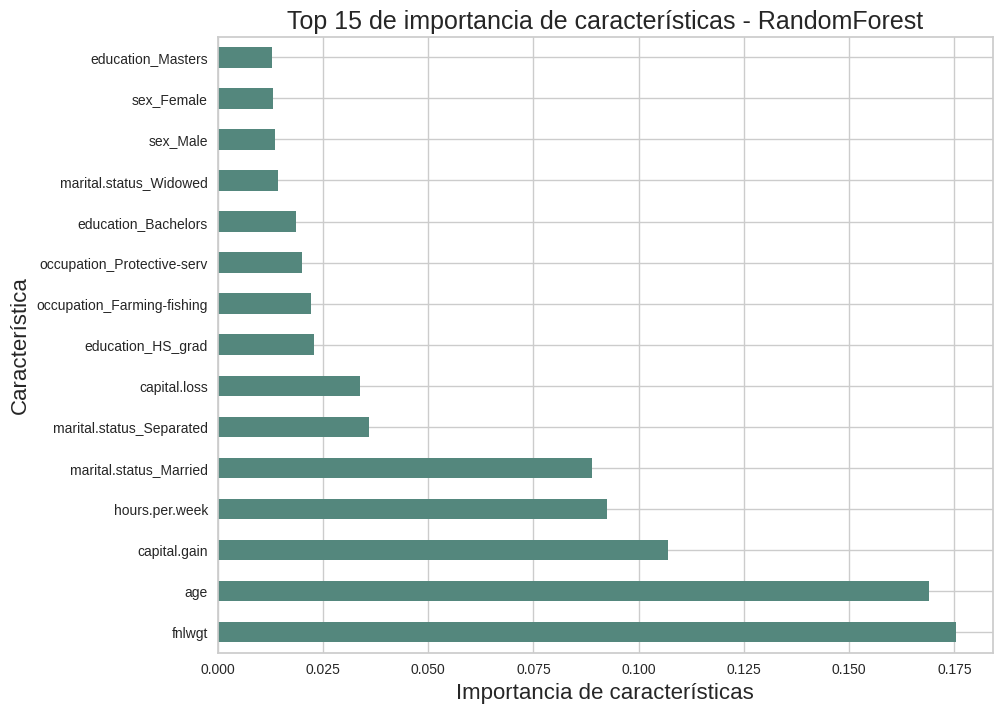

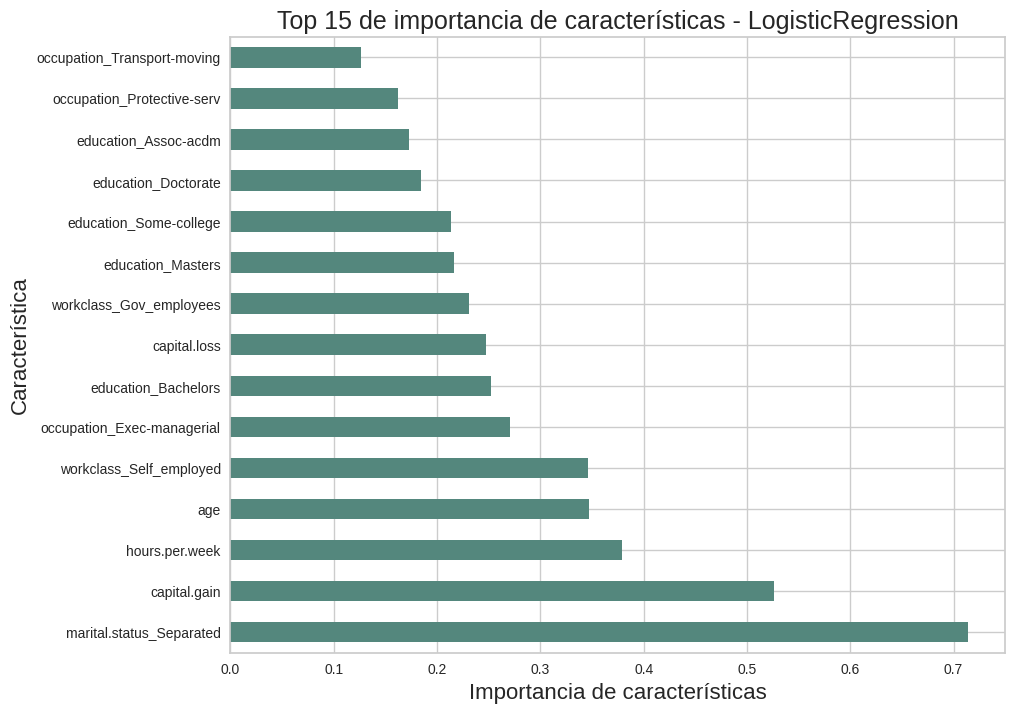

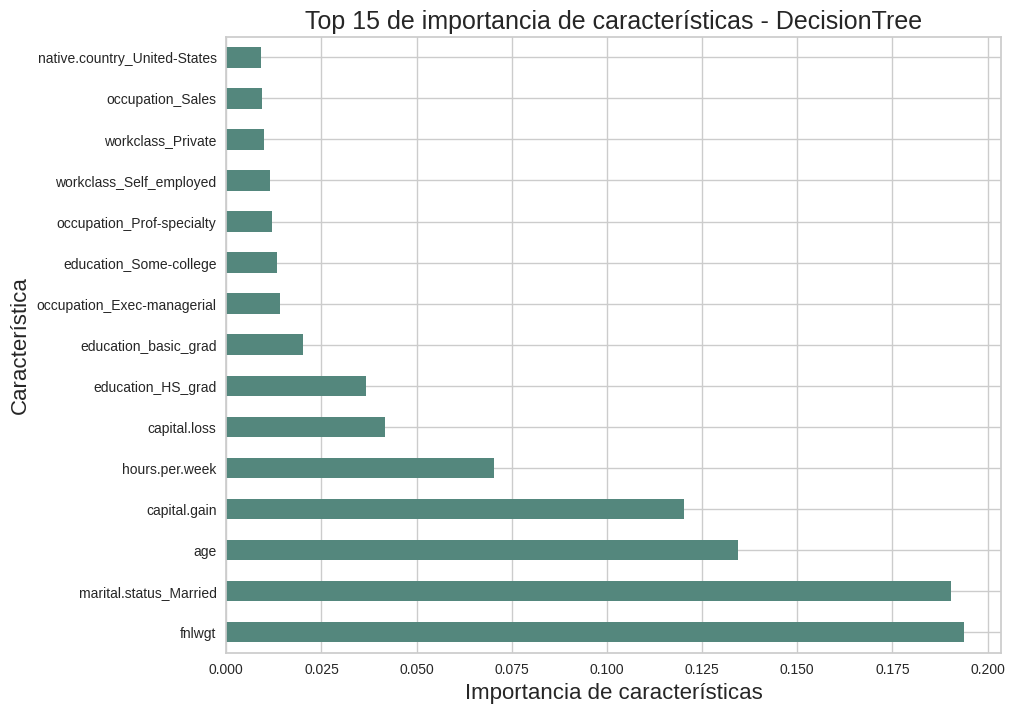

In [ ]:
for classifiers_name, result in grid_best_results.items():

    model = result['best_estimator']

    plot_features_importances( model, xtrain, classifiers_name, 15 )

##### Observaciones

**AdaBoost**

<br>

AdaBoost está poniendo un énfasis significativo en las características financieras y de trabajo, lo que sugiere que estas variables tienen un fuerte impacto en la predicción de los ingresos.

<br>

**Decision Tree**

El árbol de decisión utiliza principalmente características demográficas y financieras para tomar decisiones, lo que indica que estas variables son fundamentales para predecir los ingresos de una persona. Sin embargo, la interpretación del árbol de decisiones puede ser más sencilla en comparación con otros modelos.

<br>

**Logistic Regression**

La regresión logística está considerando tanto factores demográficos como financieros, pero también está poniendo énfasis en el estado civil, lo que podría reflejarlo como un factor relevante en la predicción de los ingresos, lo que sugiere que las circunstancias relacionadas con el estado civil pueden influir en los niveles de los ingresos de una persona. El aumento en la edad y las horas por semana laboradas pueden incidir en los ingresos tal como se vio en la minería de los datos.

<br>

**Random Forest**

Random Forest refleja hallazgos similares a los del árbol de decisión, centrándose en características demográficas y financieras clave para la clasificación de ingresos. El aumento en la edad y las horas por semana laboradas pueden incidir en los ingresos tal como se vio en la minería de los datos.



### Balanceo de los modelos

Para liberar a los modelos de generar predicciónes deficientes al ser entrenados en conjuntos de datos desbalanceados, deben ser entrenados a partir de nuevos conjuntos de datos que cuya información ha sido sintetizada a partir de los datos existentes sobremuestreando la clase minoritaria para crear el balance en los modelos. Para esto se va a usar la Técnica de sobremuestreo de minorías sintéticas (SMOTE).

<br>

Fuente ([SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/))



Basado en la técnica SMOTE se realiza lo siguiente

1.   A partir del conjunto de datos reducido se generan datos sintéticos alrededor de 50 mil muestras por valor de la variable objetivo.
2.   Se entrena cada uno de los modelos con los nuevos conjuntos de datos.
3.   Se generan datos sintéticos para el conjunto de datos de prueba.
4.   Se evalua cada uno de los modelos con los nuevos datos de prueba.
5.   Se genera la estimación para cada uno de los modelos



In [ ]:
# 1. Recupera el modelo y su conjunto de datos reducido
# 2. Hace una nueva predicción con el conjunto de datos reducido
# 3. Crea un nuevo conjunto de pruebas con datos sintéticos.
# 4. Hace la estimación del modelo

accuracy = []

for classifiers_name, result in grid_best_results.items():


    # realiza la estimación de los modelos
    accuracy_scores = accuracy_score(
            y_true    = y_test_resampled,
            y_pred    = ypred,
            normalize = True
    )

    accuracy.append( accuracy_scores )



# Muestra los modelos y su precisión
pd.DataFrame(accuracy, columns = ['Precisión'], index = classifiers_cv).sort_values(by = 'Precisión', ascending = False)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (50000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 9235)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (50000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 9235)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (50000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 9754)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (50000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 9754)
  warnings.warn(


Precisión
LogisticRegression    1.00000
Adaboost              0.97270
RandomForest          0.96474
DecisionTree          0.88785

##### Observación


| **Modelo** | **Precisión datos Iniciales** | **Precisión datos reducidos** | **Precisión con sobremuestreo**
|---|:---:|:---:|:---:|
| LogisticRegression | 0.840944 | 0.839022 | 1.00000 |
| Adaboost | 0.860470 | 0.868158 | 0.97270 |
| RandomForest | 0.845172 | 0.847402 | 0.96474 |
| DecisionTree | 0.805889 | 0.805274 | 0.88785 |

<br>

Posterior al uso de la técnica SMOTE los resultados fueron sorprendentes, con mejoras significativas en la precisión de todos los modelos.

El uso de SMOTE para balancear los datos ha demostrado ser una técnica extremadamente efectiva para mejorar la precisión de los modelos de clasificación. En particular, LogisticRegression se benefició enormemente de este enfoque.


